In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Visualisation des données

### 2.1. Distribution des étiquettes

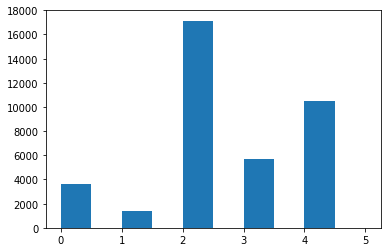

In [3]:
%run data_importation.py
plt.hist(y, range = (0, 5))
plt.show()

### 2.2. Visualisation des signaux

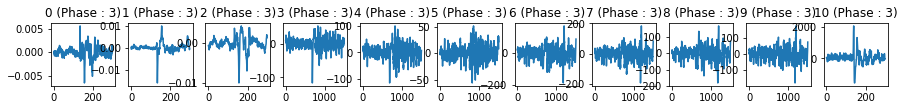

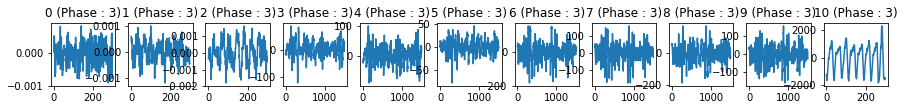

In [4]:
for i in range(2):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        plt.subplot(11,11,k_id+1)
        plt.plot(X_train[k][i])
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

## 2. Analyse fréquentielle

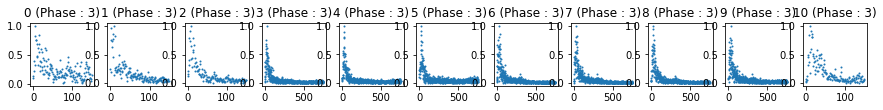

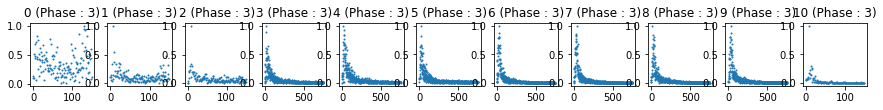

In [6]:
for i in range(2):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        signal=X_train[k][i]
        
        Ne = len(signal)
        spectre = np.absolute(np.fft.fft(signal))
        spectre = spectre[0:len(spectre)//2]
        spectre = [s/max(spectre) for s in spectre]
        
        plt.subplot(11,11,k_id+1)
        plt.plot(spectre, marker="o", markersize=1, linestyle="none")
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

### Observations :

L'amplitude des fréquences varie en fonction de la phase... à compléter

## 3. Entrainement par cross-validation

### 3.1 Matrice de design

#### Construction de la matrice

In [12]:
import feature_extraction

X_train_fft = h5py.File('X_train_fft.h5','r')
X_test_fft = h5py.File('X_test_fft.h5','r')

X_train_preprocessed = feature_extraction.extractMultiFeatureAll(X_train_fft, [feature_extraction.nbPikesOne], [[5,0.2]], save=True, name_save="trainX")
X_test_preprocessed = feature_extraction.extractMultiFeatureAll(X_test_fft, [feature_extraction.nbPikesOne], [[5,0.2]], save=True, name_save="testX")

#### Chargement de la matrice

In [1]:
import pickle

temp_var_file = open("trainX" + '.txt','rb')
X_train_preprocessed = pickle.load(temp_var_file)
temp_var_file.close()

temp_var_file = open("testX" + '.txt','rb')
X_test_preprocessed = pickle.load(temp_var_file)
temp_var_file.close()

### 3.2 Apprentissage

In [2]:
import cross_validation_learning

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Méthode k-nn

In [6]:
from sklearn import neighbors

mat_theta, mat_ypred, mat_yprob = cross_validation_learning.learn(X_train_preprocessed, neighbors.KNeighborsClassifier, [[i for i in range(1,5,2)]], 10)

[1]
1
3


#### Méthode de régression logistique

In [5]:
from sklearn import linear_model

mat_theta, mat_ypred, mat_yprob = cross_validation_learning.learn(X_train_preprocessed, linear_model.LogisticRegression, [['l2'], [False], [0.0001,0.0002,0.0003], [1,1000]], 10)

[1, 1, 1, 3]
l2 False 0.0001 1
l2 False 0.0002 1
l2 False 0.0003 1
l2 False 0.0001 1000
l2 False 0.0002 1000
l2 False 0.0003 1000


#### Méthode de l'arbre de décision

In [3]:
from sklearn import tree

mat_theta, mat_ypred, mat_yprob = cross_validation_learning.learn(X_train_preprocessed, tree.DecisionTreeClassifier, [[]], 10)

### 3.3 Visualisation des résultats

#### Méthode k-nn

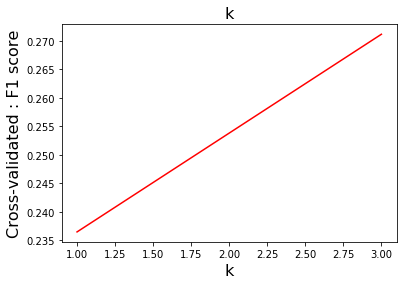

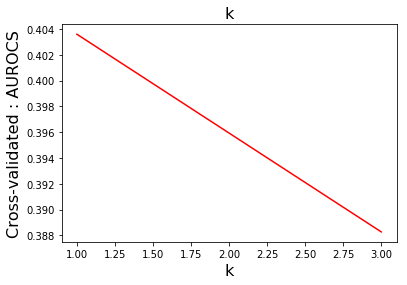

In [7]:
cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "k", [])

#### Méthode de régression logistique

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


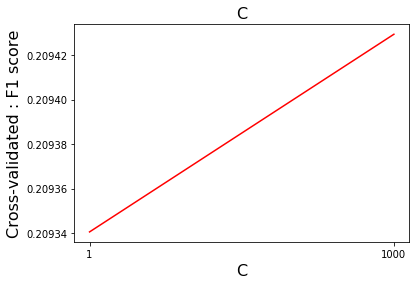

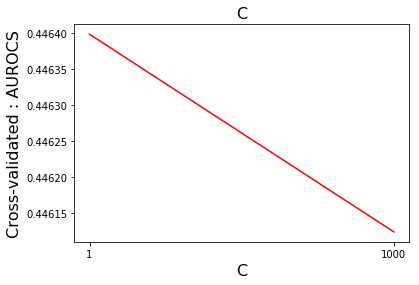

In [6]:
cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 3, "C", [0, 0, 0])

#### Méthode de l'arbre de décision

In [4]:
cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [])

F1-score : 0.21082732534785142
AUROC : 0.4223758188391147


## 4. Prédiction sur le dataset de test

= : 21256


Text(0.5,1,'Nearest neighbors classification')

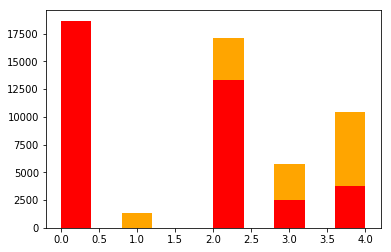

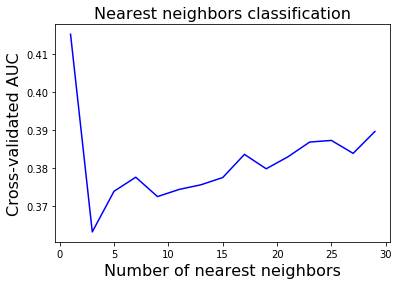

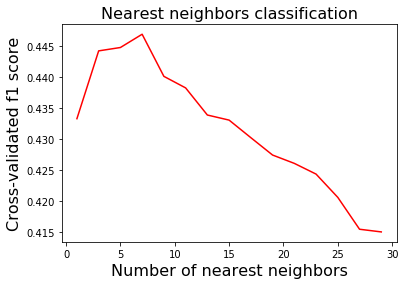

In [69]:
print("= :",sum(ypred==y))
a = (ypred==y)*ypred
plt.figure()
hist(y, color="orange")
hist(a, color="red")

plt.figure()
plt.plot(range(1, 30, 2), aurocs, color='blue')
plt.xlabel('Number of nearest neighbors', fontsize=16)
plt.ylabel('Cross-validated AUC', fontsize=16)
plt.title('Nearest neighbors classification', fontsize=16)


plt.figure()
plt.plot(range(1, 30, 2), f1_scores, color='red')
plt.xlabel('Number of nearest neighbors', fontsize=16)
plt.ylabel('Cross-validated f1 score', fontsize=16)
plt.title('Nearest neighbors classification', fontsize=16)